In [2]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt

data_dir = '/blue/stevenweisberg/share/catscenes/data/tuningCurves/'

files = glob.glob(data_dir + '*tuning*.csv',recursive=True)


In [3]:
def reformat_data(file_name):
    
    # Grab the subject ID from the filename
    subj_id = file_name.split('/')[-1][:5]
    
    # Transpose the table so we can use the image names as an index
    processed_data = pd.read_csv(file_name).transpose()
    
    # Drop the images that have no data (subjects did not provide responses to all images; only 100/500)
    #processed_data.dropna(inplace=True)
    # Reformat the index into a multi-index to refer to each image as its name and subject id
    processed_data = pd.concat({subj_id : processed_data}, names=['participant','image'])
    
    return processed_data

# Load the first data file
all_data = reformat_data(files.pop(0))

# For the rest of the files, add them to the whole dataset
for file in files:
    
    subj_data = reformat_data(file)
    all_data = all_data.append(subj_data)

display(all_data.shape)

(21500, 36)

In [4]:

image_data = all_data.xs('ATM1.jpg', level=1, drop_level=False)
print(image_data.dropna())

                            0         1         2         3         4   \
participant image                                                        
44124       ATM1.jpg -0.397256 -0.397256 -0.397256 -0.397256 -0.397256   
44526       ATM1.jpg -0.353150 -0.353150 -0.353150 -0.353150 -0.353150   
43851       ATM1.jpg -0.676043 -0.676043 -0.676043 -0.676043 -0.676043   

                            5         6         7         8         9   ...  \
participant image                                                       ...   
44124       ATM1.jpg -0.397256 -0.397256 -0.397256 -0.397256  1.390396  ...   
44526       ATM1.jpg -0.353150 -0.353150 -0.353150 -0.353150  1.346897  ...   
43851       ATM1.jpg -0.676043 -0.676043 -0.204994  3.406384  2.778318  ...   

                            26        27        28        29        30  \
participant image                                                        
44124       ATM1.jpg -0.397256 -0.397256 -0.397256 -0.397256 -0.397256   
44526      

r-value for that image =  0.71


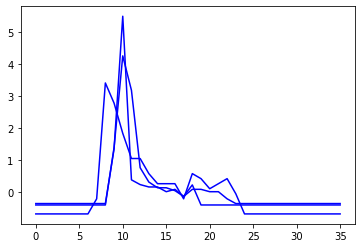

r-value for that image =  0.6


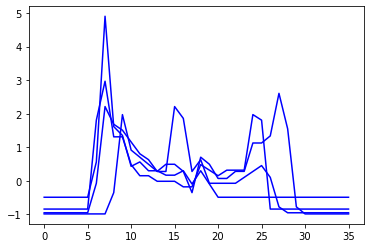

r-value for that image =  0.55


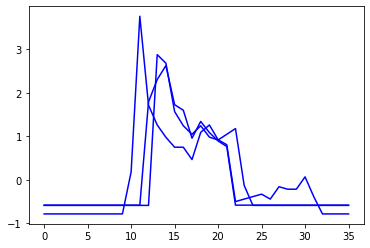

r-value for that image =  0.67


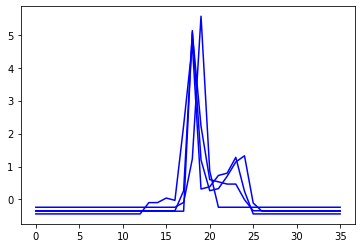

r-value for that image =  0.58


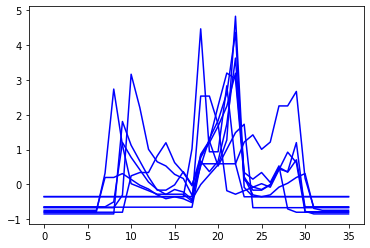

r-value for that image =  1.0


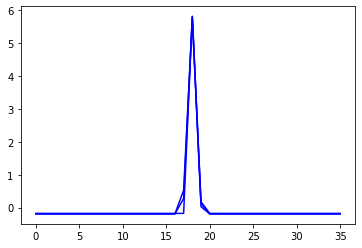

r-value for that image =  0.44


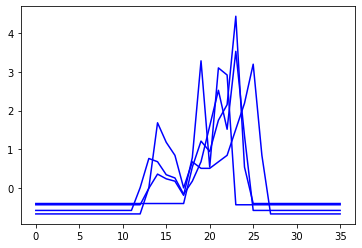

r-value for that image =  0.64


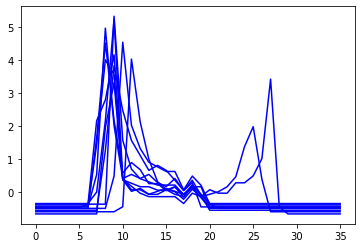

r-value for that image =  0.06


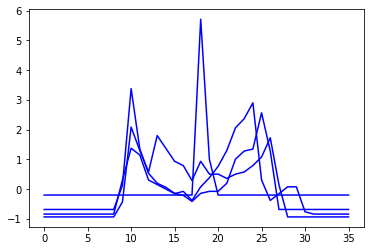

r-value for that image =  0.59


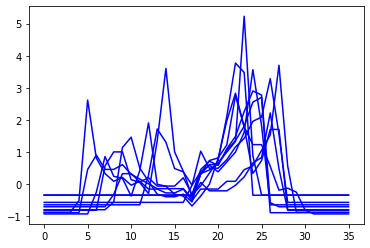

r-value for that image =  0.57


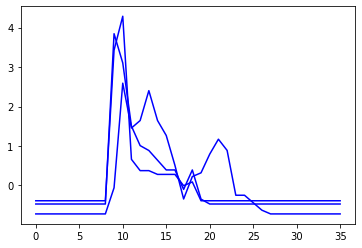

r-value for that image =  0.83


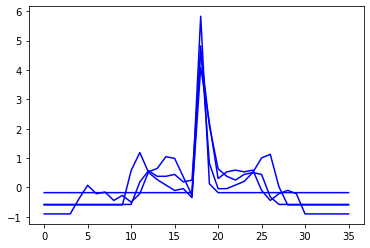

r-value for that image =  0.93


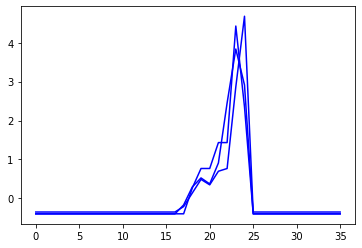

r-value for that image =  0.41


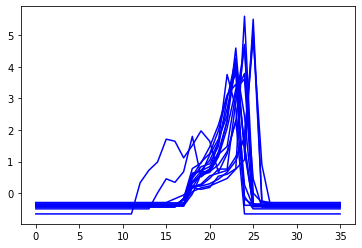

r-value for that image =  0.68


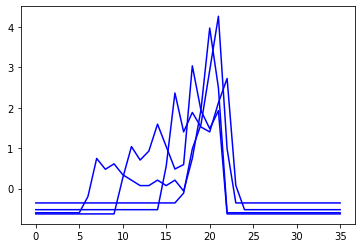

r-value for that image =  0.88


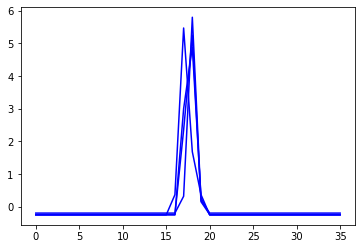

r-value for that image =  0.63


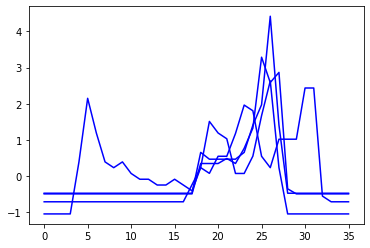

r-value for that image =  0.69


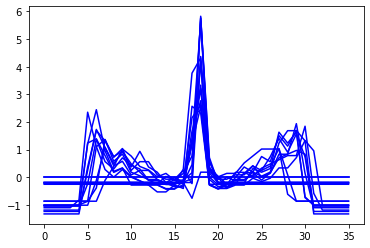

r-value for that image =  0.51


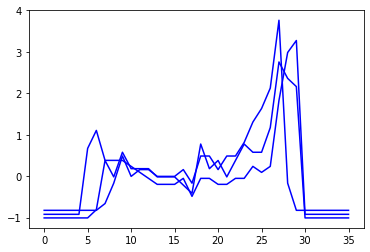

r-value for that image =  0.74


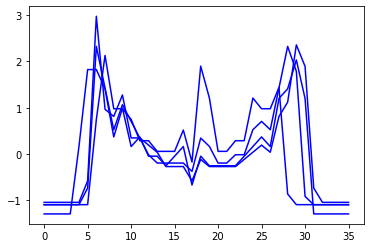

r-value for that image =  0.54


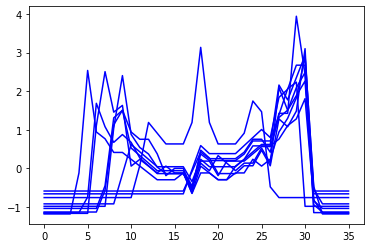

r-value for that image =  0.51


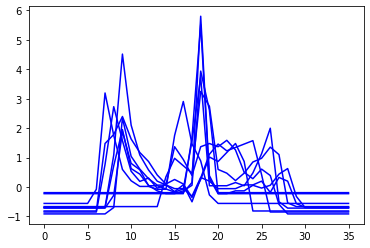

r-value for that image =  0.57


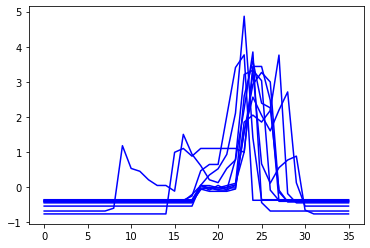

r-value for that image =  0.84


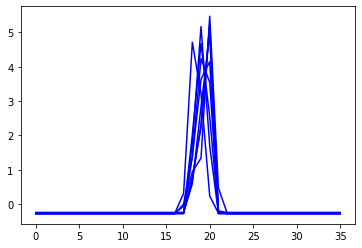

r-value for that image =  0.44


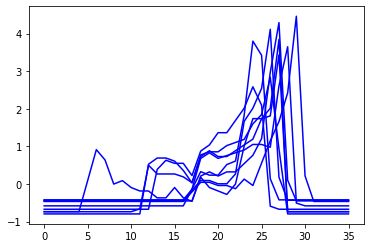

r-value for that image =  0.57


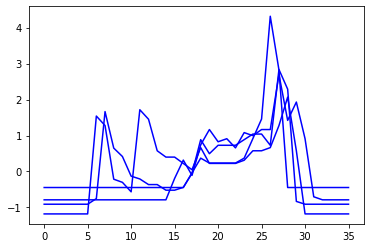

r-value for that image =  0.55


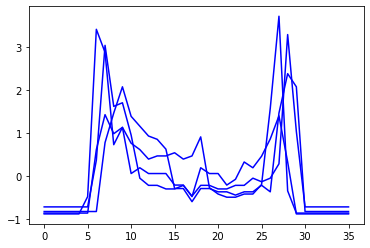

r-value for that image =  0.82


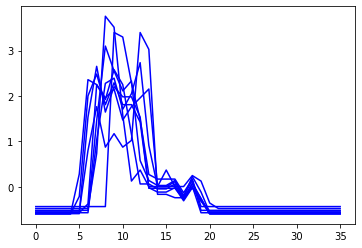

r-value for that image =  0.78


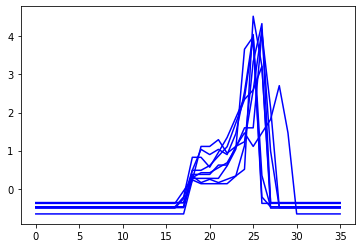

r-value for that image =  0.56


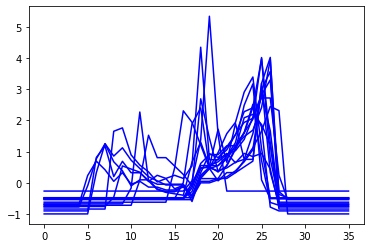

r-value for that image =  0.71


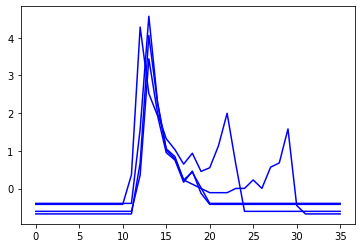

r-value for that image =  0.39


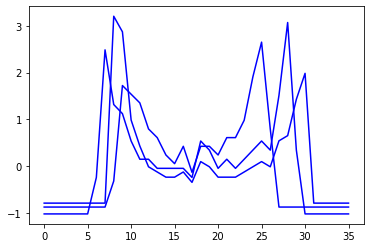

r-value for that image =  0.74


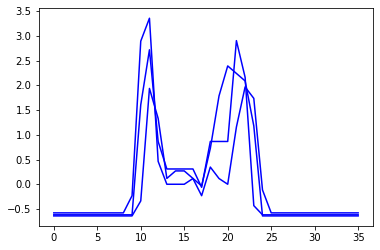

r-value for that image =  0.65


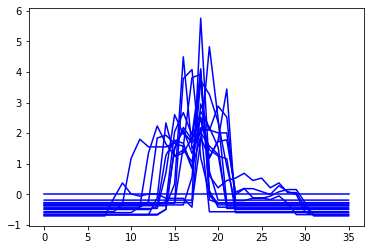

r-value for that image =  0.55


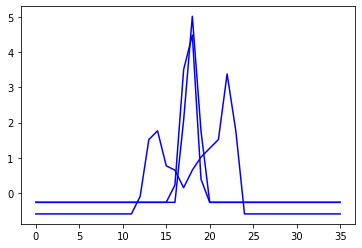

r-value for that image =  0.63


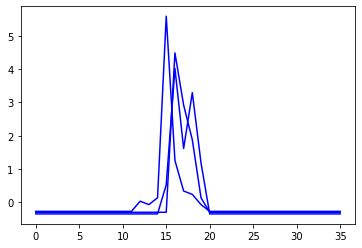

r-value for that image =  0.79


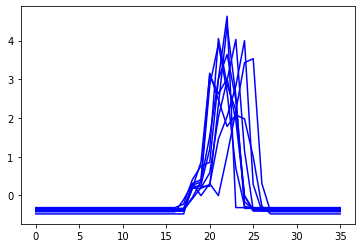

r-value for that image =  0.29


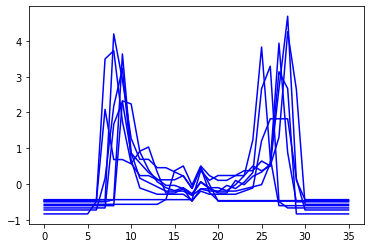

r-value for that image =  0.88


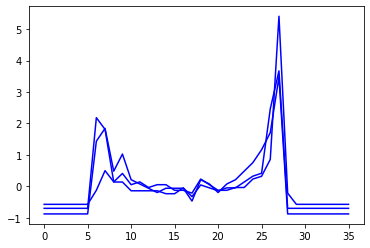

r-value for that image =  0.3


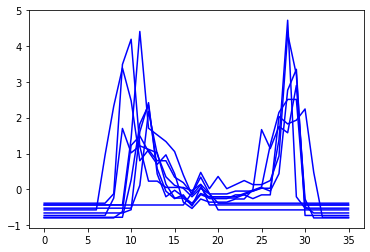

r-value for that image =  0.37


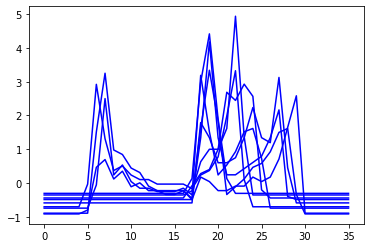

r-value for that image =  0.5


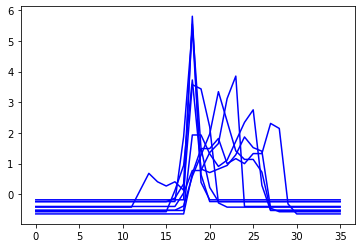

r-value for that image =  0.73


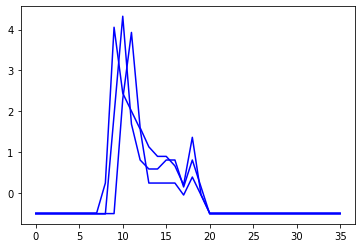

r-value for that image =  0.47


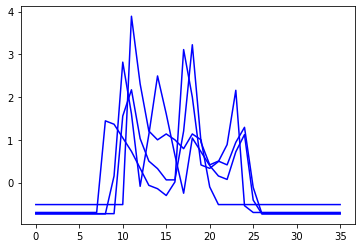

r-value for that image =  0.76


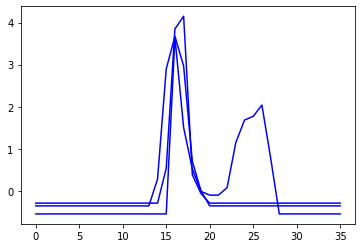

r-value for that image =  0.54


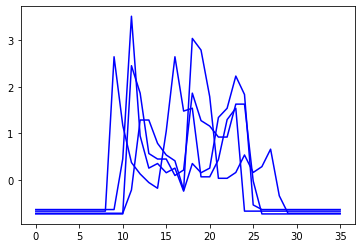

r-value for that image =  0.52


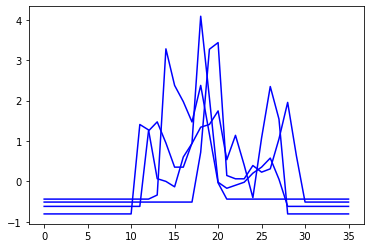

r-value for that image =  0.59


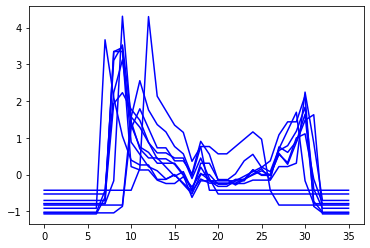

r-value for that image =  0.49


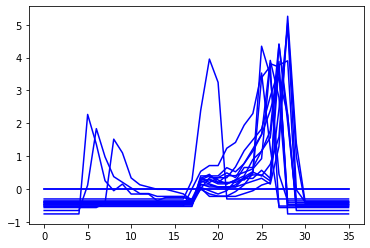

r-value for that image =  0.69


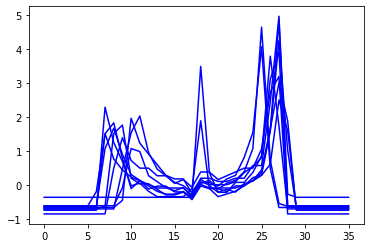

r-value for that image =  0.88


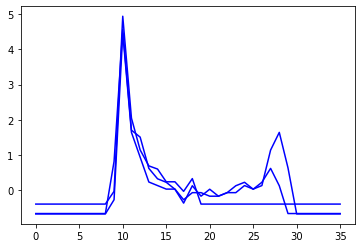

r-value for that image =  0.4


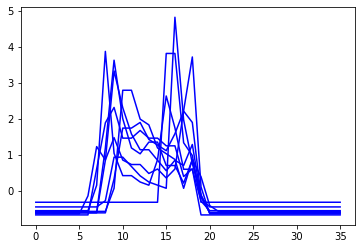

r-value for that image =  0.77


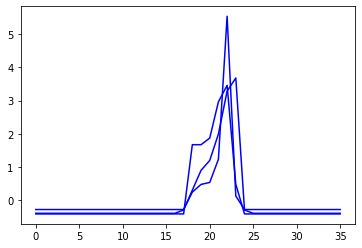

r-value for that image =  0.25


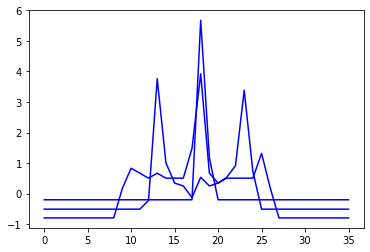

r-value for that image =  0.27


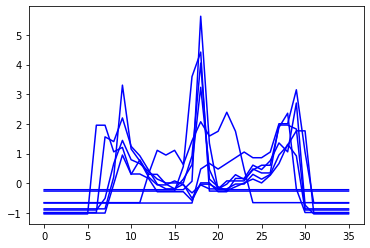

r-value for that image =  0.5


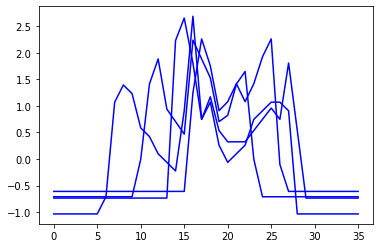

r-value for that image =  0.52


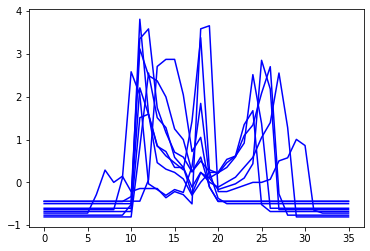

r-value for that image =  0.48


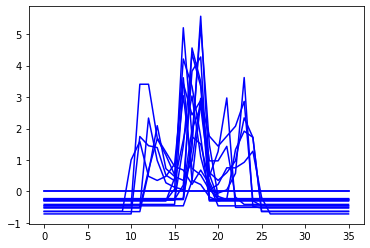

r-value for that image =  0.86


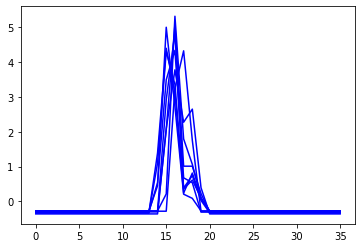

r-value for that image =  0.9


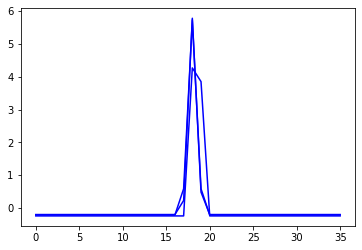

r-value for that image =  0.67


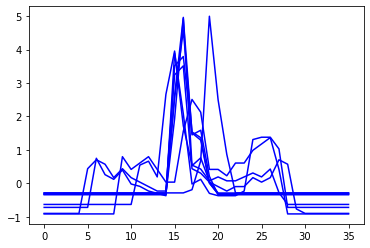

r-value for that image =  0.48


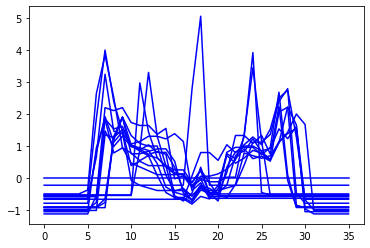

r-value for that image =  0.51


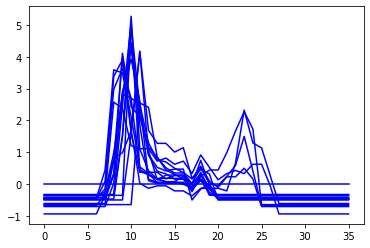

r-value for that image =  0.51


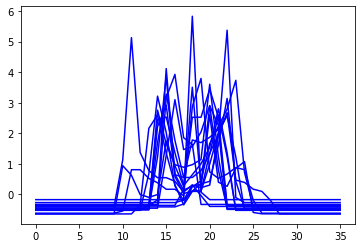

r-value for that image =  0.69


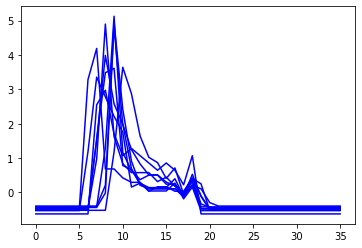

r-value for that image =  0.42


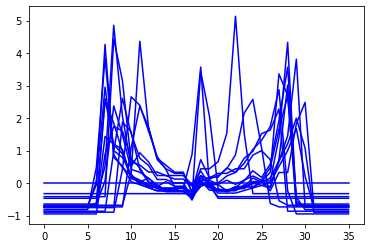

r-value for that image =  -0.05


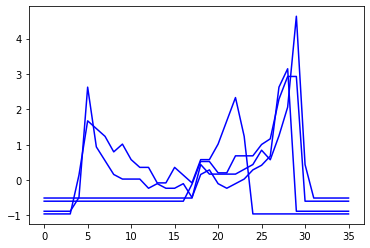

r-value for that image =  0.64


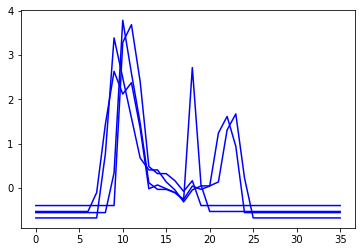

r-value for that image =  0.35


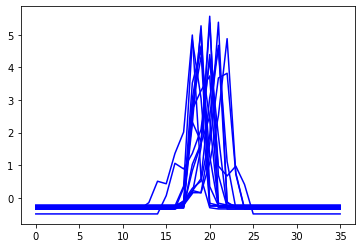

r-value for that image =  0.18


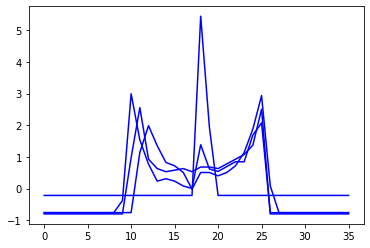

r-value for that image =  0.73


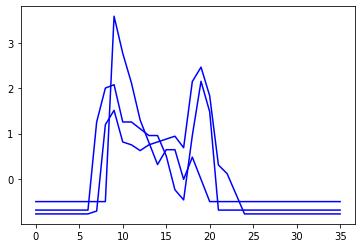

r-value for that image =  0.56


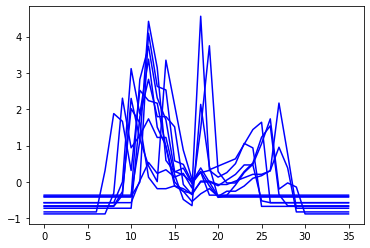

r-value for that image =  0.81


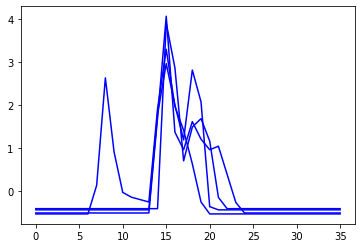

r-value for that image =  0.63


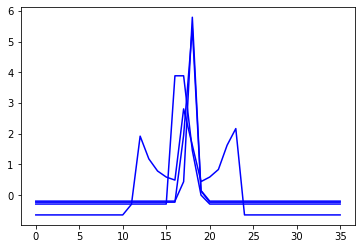

r-value for that image =  0.38


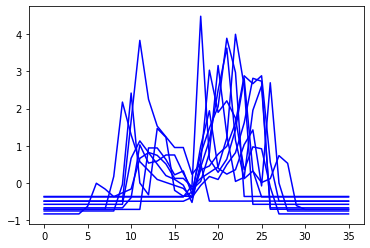

r-value for that image =  0.48


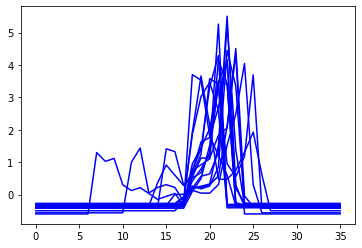

r-value for that image =  0.21


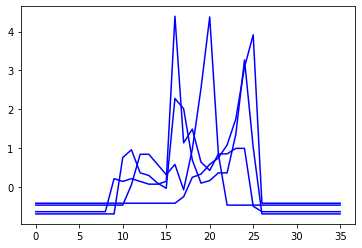

r-value for that image =  0.67


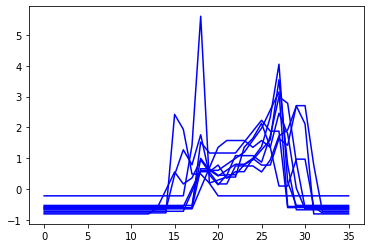

r-value for that image =  0.35


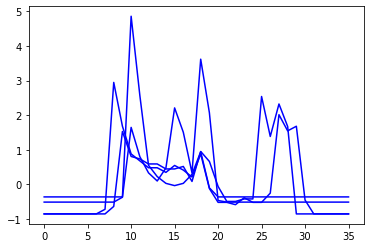

r-value for that image =  0.41


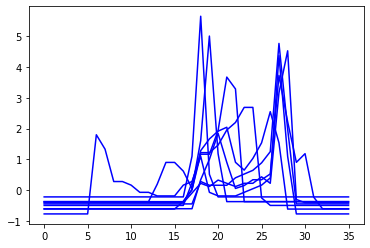

r-value for that image =  0.51


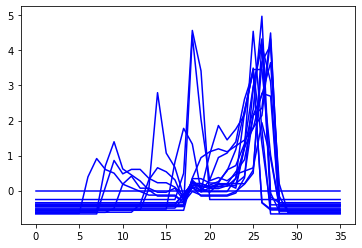

r-value for that image =  0.26


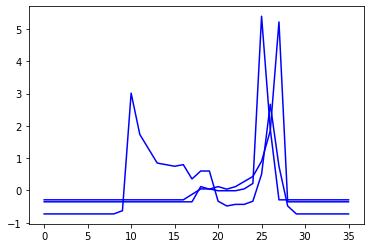

r-value for that image =  0.52


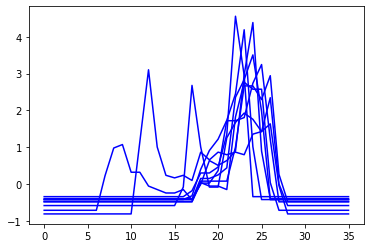

r-value for that image =  0.15


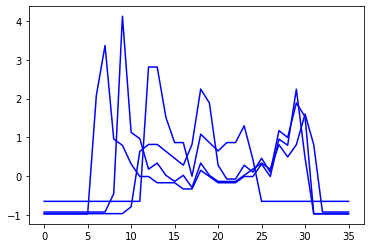

r-value for that image =  0.28


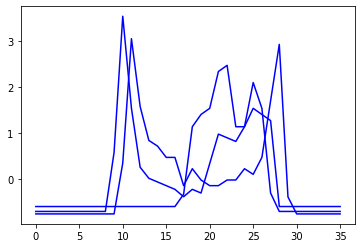

r-value for that image =  0.4


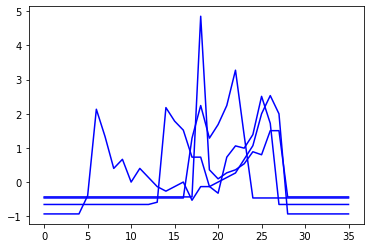

r-value for that image =  0.25


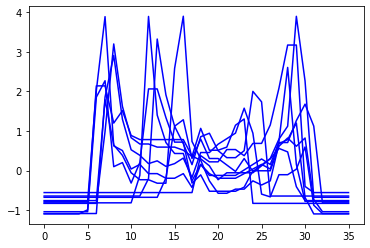

r-value for that image =  0.55


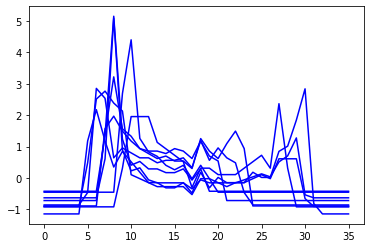

r-value for that image =  0.6


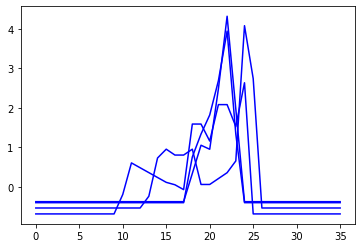

r-value for that image =  0.15


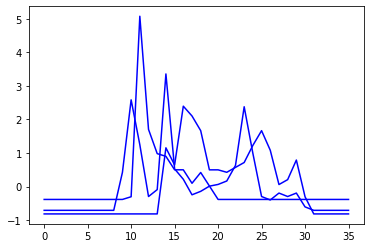

r-value for that image =  0.8


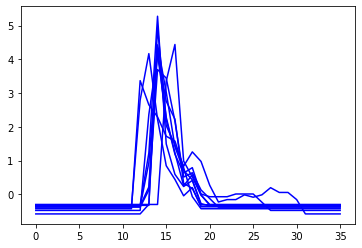

r-value for that image =  0.55


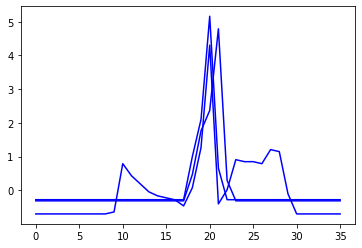

r-value for that image =  0.3


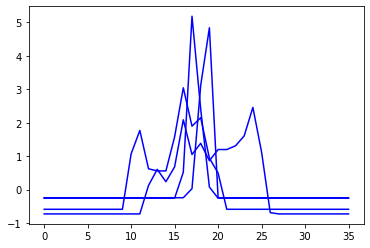

r-value for that image =  0.64


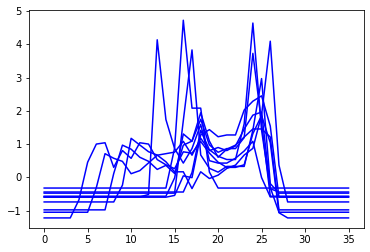

r-value for that image =  0.23


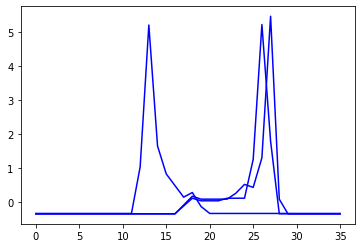

r-value for that image =  0.62


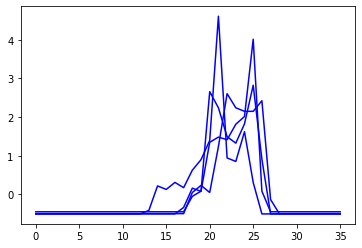

r-value for that image =  0.41


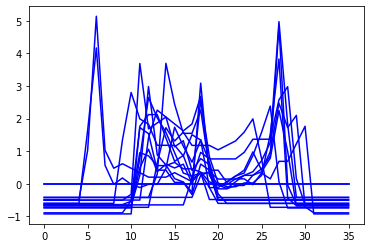

r-value for that image =  0.55


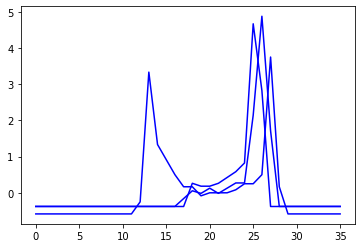

r-value for that image =  0.58


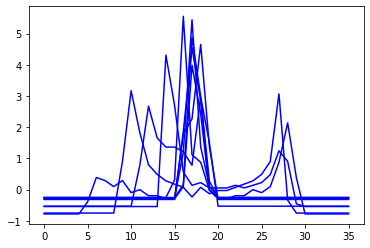

r-value for that image =  0.43


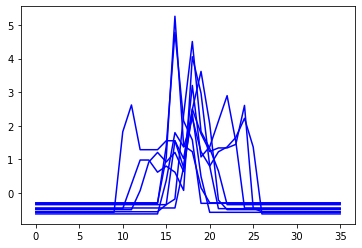

In [5]:
# Get all unique image names
images = all_data.index.unique(level=1)

def plot_all_tuning_curves(image_name,df):
    '''
    Takes in the name of an image and plots all tuning curves from each participant
    for that image. 
    
    image_name - string. The name of the image to plot
    df - dataframe generated by the functions above where each entry is the tuning curve data for each subject.

    '''
    
    # Slice just the image data from the df
    image_data = df.xs(image_name, level=1, drop_level=False)
    
    # Create a figure
    fig, ax = plt.subplots()
    
    
    # For each non-nan row (not every subject responded to every image)
    for i in range(image_data.dropna().shape[0]):
        
        # Plot each image
        plt.plot(image_data.dropna().iloc[i,:], color='blue')
        
    # The correlation of each row of that dataframe with every other row
    corr_value = image_data.dropna().corrwith(image_data.dropna().iloc[0], axis=1)
    # Exclude the correlation of that row with itself
    corr_value = corr_value[1:]
    print('r-value for that image = ', corr_value[:].mean().round(2))
    
    plt.show()
    
    
for i in range(100):
    plot_all_tuning_curves(images[i],all_data)

    
# TO DO: 

# Pretty up the figures :) 
# Save the correlation data
# Generate varied tuning curves! 

In [7]:
all_data. corr(column_2)

NameError: name 'column_2' is not defined